<a href="https://colab.research.google.com/github/eswaran-m13/colab/blob/main/allPrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #1.A.DIMENSIONS CREATING AND MANIPULATING TENSORS
import tensorflow as tf
primes = tf.constant([2, 3, 5, 7, 11, 13], dtype=tf.int32)
print("primes:", primes)
ones = tf.ones([6], dtype=tf.int32)
print("ones:", ones)
add_primes = tf.add(primes, ones)
print("add_primes:",add_primes)
twos = tf.constant([2, 2, 2, 2, 2, 2], dtype=tf.int32)
primes_doubled = primes * twos
print("primes_doubled:", primes_doubled)
some_matrix = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)
print(some_matrix)
print("\nvalue of some_matrix is:\n", some_matrix.numpy())

primes: tf.Tensor([ 2  3  5  7 11 13], shape=(6,), dtype=int32)
ones: tf.Tensor([1 1 1 1 1 1], shape=(6,), dtype=int32)
add_primes: tf.Tensor([ 3  4  6  8 12 14], shape=(6,), dtype=int32)
primes_doubled: tf.Tensor([ 4  6 10 14 22 26], shape=(6,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

value of some_matrix is:
 [[1 2 3]
 [4 5 6]]


In [ ]:
#1.B.TRAIN AND EVALUATE
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
model = Sequential([Flatten(input_shape=(28, 28)),Dense(128, activation='relu'),Dense(64, activation='relu'),Dense(10, activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2648 - accuracy: 0.9226 - val_loss: 0.1552 - val_accuracy: 0.9511
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1144 - accuracy: 0.9657 - val_loss: 0.1066 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0774 - accuracy: 0.9757 - val_loss: 0.0948 - val_accuracy: 0.9710
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.1007 - val_accuracy: 0.9707
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9749


TypeError: ignored

In [ ]:
#BINARY CLASSIFICATION
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([Dense(64, activation='relu'),Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.7265 - accuracy: 0.4781 - val_loss: 0.7133 - val_accuracy: 0.3688
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4062 - val_loss: 0.6750 - val_accuracy: 0.5813
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5063 - val_loss: 0.6458 - val_accuracy: 0.6000
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6062 - val_loss: 0.6255 - val_accuracy: 0.6812
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6656 - val_loss: 0.6008 - val_accuracy: 0.6812
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7453 - val_loss: 0.5823 - val_accuracy: 0.7812
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7766 - val_loss: 0.5573 - val_accuracy: 0.7750
Epoch 8/10
20/20 [=

In [ ]:
 #Overfitting
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

melbourne_data = pd.read_csv('melb_data.csv').dropna(axis=0)

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
y = melbourne_data.Price

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

def get_mae(max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes)
    print(f"Max leaf nodes: {max_leaf_nodes}\t Mean Absolute Error: {my_mae:.0f}")


Max leaf nodes: 5	 Mean Absolute Error: 347380
Max leaf nodes: 50	 Mean Absolute Error: 258171
Max leaf nodes: 500	 Mean Absolute Error: 243496
Max leaf nodes: 5000	 Mean Absolute Error: 255575


B0 value 1.2363636363636363
B1 value 1.1696969696969697


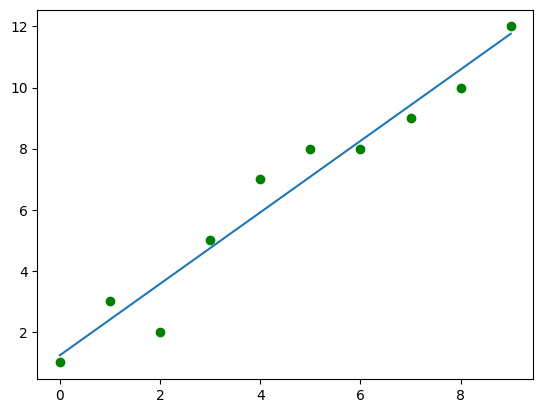

In [ ]:
#Regression
import numpy as np
import matplotlib.pyplot as plt
def estimate(x,y):
  n=np.size(x)
  mx=np.mean(x)
  my=np.mean(y)
  Sxy=np.sum(x*y)-n*my*mx
  Sxx=np.sum(x*x)-n*mx*mx
  b1=Sxy/Sxx
  b0=my-b1*mx
  return (b0,b1)
def plot(x,y,b):
  plt.scatter(x,y,color='g')
  a=b[0]+b[1]*x
  plt.plot(x,a)
  plt.show()
def main():
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  b=estimate(x,y)
  print("B0 value",b[0])
  print("B1 value",b[1])
  plot(x,y,b)
main()

In [ ]:
 #6.RNN
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.layers.SimpleRNN(32, input_shape=(10,1)),keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
X_train = np.random.randn(100, 10, 1)
y_train = np.random.randn(100, 1)
model.fit(X_train, y_train, epochs=10, batch_size=32)
X_test = np.random.randn(10, 10, 1)
y_test = np.random.randn(10, 1)
model.evaluate(X_test,y_test)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.0681
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9575
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9016
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8565
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8324
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8219
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8134
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8107
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8088
Epoch 10/10
1/1 [==============================] - 0s 181ms/step - loss: 0.7462


0.7462185621261597

In [ ]:
!pip install gTTS
from gtts import gTTS
text_to_say="welcome everyone"
language = 'en'
gtts_object = gTTS(text = text_to_say,lang = language,slow = False)
gtts_object.save("/content/gtts.wav")
from IPython.display import Audio
Audio("/content/gtts.wav")

In [1]:
#Image Captioning
import urllib
import requests
import os
urllib.request.urlretrieve("https://i.ibb.co/xY4DJJ5/img1.jpg", "img1.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Gnd1Y1L/img2.jpg", "img2.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Z6JgS1L/img3.jpg", "img3.jpg")
print('Images downloaded')
path = os.getcwd()
captionarr = [
 "This is the first caption",
 "This is the second caption",
 "This is the third caption"
 ]
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
print(os.getcwd())
def ext(file):
  index = file.find(".jpg")
  current_file = ""
  current_file = file[index:]
  return current_file
def ext2(file):
  index = file.find(".jpeg")
  current_file = ""
  current_file = file[index:]
  return current_file
def ext3(file):
  index = file.find(".png")
  current_file = ""
  current_file = file[index:]
  return current_file
def convert(words):
  s = ""
  for word in words:
    s += word.upper()
  return s
caption_first = convert(captionarr[0])
caption_second = convert(captionarr[1])
caption_third = convert(captionarr[2])
print(caption_first)
print(caption_second)
print(caption_third)
count = 0
for f in os.listdir('.'):
  try:
    if (ext(f) == '.jpg' or ext2(f) == '.jpeg' or ext3(f) == '.png'):
      img = Image.open(f)
      width, height = img.size
      basewidth = 1200
      wpercent = (basewidth / float(img.size[0]))
      hsize = int((float(img.size[1])*float(wpercent)))
      img = img.resize((basewidth, hsize), Image.ANTIALIAS)
      new_width, new_height = img.size
      if not img.mode == 'RGB':
        img = img.convert('RGB')
        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype("Arial Bold.ttf", 35)
        if count == 0:
          draw.text((new_width / 15 + 25, new_height - 100),caption_first, (255, 0, 0), font = font,align ="center")
        elif count == 1:
          draw.text((new_width / 15 + 25, new_height - 100),caption_second, (255, 0, 0), font = font,align ="center")
        else:
          draw.text(( new_width / 15 + 25, new_height - 100),caption_third, (255, 0, 0), font = font,align ="center")
        img.save("CaptionedImges/{}".format(f))
        print('done')
        count = count + 1
  except OSError:
    pass
import os
import glob
import shutil
fnames = []
for file in os.listdir('.'):
 fnames.append(file)
fnames.sort(key = lambda x: os.stat(x).st_ctime, reverse = True)

Images downloaded
/content
THIS IS THE FIRST CAPTION
THIS IS THE SECOND CAPTION
THIS IS THE THIRD CAPTION


<ipython-input-1-ca3056d2fa42>:54: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


In [2]:
#CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10,batch_size=200, verbose=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
300/300 - 44s - loss: 0.3741 - accuracy: 0.8868 - 44s/epoch - 148ms/step
Epoch 2/10
300/300 - 44s - loss: 0.1110 - accuracy: 0.9678 - 44s/epoch - 146ms/step
Epoch 3/10
300/300 - 42s - loss: 0.0812 - accuracy: 0.9760 - 42s/epoch - 139ms/step
Epoch 4/10
300/300 - 42s - loss: 0.0654 - accuracy: 0.9806 - 42s/epoch - 139ms/step
Epoch 5/10
300/300 - 41s - loss: 0.0560 - accuracy: 0.9830 - 41s/epoch - 138ms/step
Epoch 6/10
300/300 - 43s - loss: 0.0489 - accuracy: 0.9848 - 43s/epoch - 144ms/step
Epoch 7/10
300/300 - 42s - loss: 0.0430 - accuracy: 0.9872 - 42s/epoch - 140ms/step
Epoch 8/10
300/300 - 41s - loss: 0.0398 - accuracy: 0.9878 - 41s/epoch - 138ms/step
Epoch 9/10
300/300 - 41s - loss: 0.0349 - accuracy: 0.9893 - 41s/epoch - 137ms/step
Epoch 10/10
300/300 - 42s - loss: 0.0310 - accuracy: 0.9901 - 42s/epoch - 139ms/step
Test accuracy: 99.10%


In [3]:
#Sequence Classification
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentences = [ "I love this product", "This is terrible", "Great job!", "Not good at all", "Awesome stuff" ]
labels = [1, 0, 1, 0, 1]
tokenizer = Tokenizer(num_words=1000, oov_token="")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding="post")
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
test_sentences = [ "This is very Bad", "I like it", "Excellent work" ]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences_padded = pad_sequences(test_sequences,maxlen=max_sequence_length, padding="post")
predictions = model.predict(test_sequences_padded)
for i, sentence in enumerate(test_sentences):
  sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
  print(f"Sentence: '{sentence}' - Sentiment: {sentiment} ({predictions[i][0]:.2f})")

1/1 [==============================] - 0s 447ms/step
Sentence: 'This is very Bad' - Sentiment: Positive (0.51)
Sentence: 'I like it' - Sentiment: Positive (0.50)
Sentence: 'Excellent work' - Sentiment: Negative (0.50)


In [4]:
#LSTM
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 20000
maxlen = 200
inputs = Input(shape=(None,), dtype="int32")
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)
model.summary()
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2658945 (10.14 MB)
Trainable params: 2658945 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
17464789/17464789 [==============================] - 0s 0us/step
25000 Training sequenc

1/1 [==============================] - 0s 67ms/step


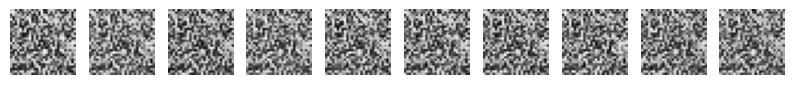

In [5]:
#GAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Define the generator model
def build_generator(latent_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(Dense(784, activation='sigmoid'))
  model.add(Reshape((28, 28, 1)))
  return model
# Define the discriminator model
def build_discriminator(input_shape):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model
# Define the GAN model that combines the generator and discriminator
def build_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0
# Normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# Set hyperparameters
latent_dim = 100
epochs = 100
batch_size = 64
# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train[0].shape)
gan = build_gan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,
beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
# Training loop
for epoch in range(epochs):
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  real_images = X_train[idx]
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  generated_images = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)
# Print progress
if (epoch + 1) % 1000 == 0:
  print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss} - G Loss: {g_loss}")
# Save generated images at specified intervals
if (epoch + 1) % 1000 == 0:
  num_samples = 10
  noise = np.random.normal(0, 1, (num_samples, latent_dim))
  generated_images = generator.predict(noise)
  plt.figure(figsize=(10, 2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
    plt.close()
# Generate and save final images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.savefig("final_generated_images.png")
plt.show()